In [1]:
import numpy as np
import pandas as pd

In [2]:
#Upload train csv file
from google.colab import files
uploaded = files.upload()

Saving training.csv to training.csv


In [11]:
#Upload test csv file
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [10]:
#Upload  validation csv file
from google.colab import files
uploaded = files.upload()

Saving validation.csv to validation (1).csv


In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
train = pd.read_csv('training.csv')
validation = pd.read_csv('validation.csv')
test = pd.read_csv('test.csv')

In [35]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [36]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['emotion'] = train['label'].map(labels_dict )
train.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [38]:
train['emotion'].value_counts(normalize=True)


joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: emotion, dtype: float64

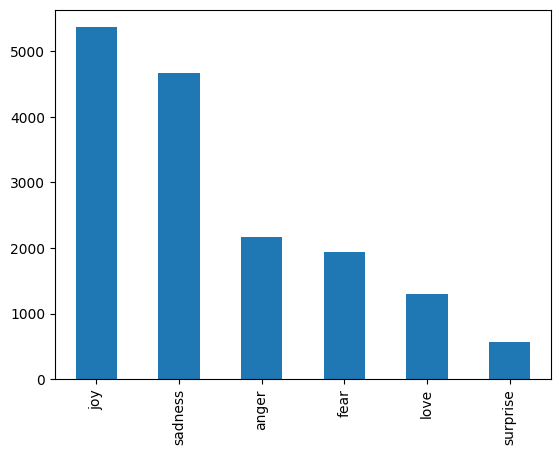

In [39]:
train['emotion'].value_counts().plot(kind='bar');


In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def text_cleaning(text):
    punctuation_removed = [char for char in text if char not in string.punctuation]
    p_join = ''.join(punctuation_removed)
    p_join_clean = [word for word in p_join.split() if word.lower() not in stopwords.words('english')]
    return p_join_clean

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train.text, train.label, test_size=0.2)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72       908
           1       0.70      0.78      0.74      1098
           2       0.71      0.43      0.53       246
           3       0.81      0.54      0.65       463
           4       0.80      0.51      0.63       397
           5       0.58      0.32      0.41        88

    accuracy                           0.69      3200
   macro avg       0.71      0.57      0.61      3200
weighted avg       0.71      0.69      0.68      3200



In [45]:
import spacy

In [46]:
nlp = spacy.load("en_core_web_sm")


In [47]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
# convert it into one sentence without stop words and punctuations(.,-) and also with the base words.

In [48]:
train['processed_text'] = train["text"].apply(preprocess)
train

,text,label,emotion,processed_text
0,i didnt feel humiliated,0,sadness,not feel humiliate
1,i can go from feeling so hopeless to so damned...,0,sadness,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,3,anger,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,love,feel nostalgic fireplace know property
4,i am feeling grouchy,3,anger,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,0,sadness,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,1,joy,feel strong good overall
15998,i feel like this was such a rude comment and i...,3,anger,feel like rude comment m glad t


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    train.processed_text,
    train.label,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=train.label
)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       933
           1       0.79      0.85      0.81      1072
           2       0.71      0.49      0.58       261
           3       0.84      0.69      0.76       432
           4       0.83      0.67      0.74       387
           5       0.73      0.48      0.58       115

    accuracy                           0.77      3200
   macro avg       0.77      0.68      0.71      3200
weighted avg       0.77      0.77      0.77      3200



In [53]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       933
           1       0.63      0.96      0.76      1072
           2       1.00      0.11      0.20       261
           3       0.96      0.34      0.51       432
           4       0.94      0.28      0.43       387
           5       1.00      0.01      0.02       115

    accuracy                           0.68      3200
   macro avg       0.87      0.44      0.45      3200
weighted avg       0.77      0.68      0.62      3200



In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.89      0.89       933
           1       0.83      0.91      0.87      1072
           2       0.82      0.64      0.72       261
           3       0.89      0.83      0.86       432
           4       0.83      0.84      0.84       387
           5       0.76      0.63      0.69       115

    accuracy                           0.85      3200
   macro avg       0.84      0.79      0.81      3200
weighted avg       0.85      0.85      0.85      3200



In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[832,  54,   1,  24,  20,   2],
       [ 36, 980,  31,   9,  10,   6],
       [  7,  80, 168,   4,   2,   0],
       [ 28,  34,   3, 357,  10,   0],
       [ 20,  17,   1,   9, 325,  15],
       [  6,  13,   0,   0,  23,  73]])

Text(95.72222222222221, 0.5, 'Truth')

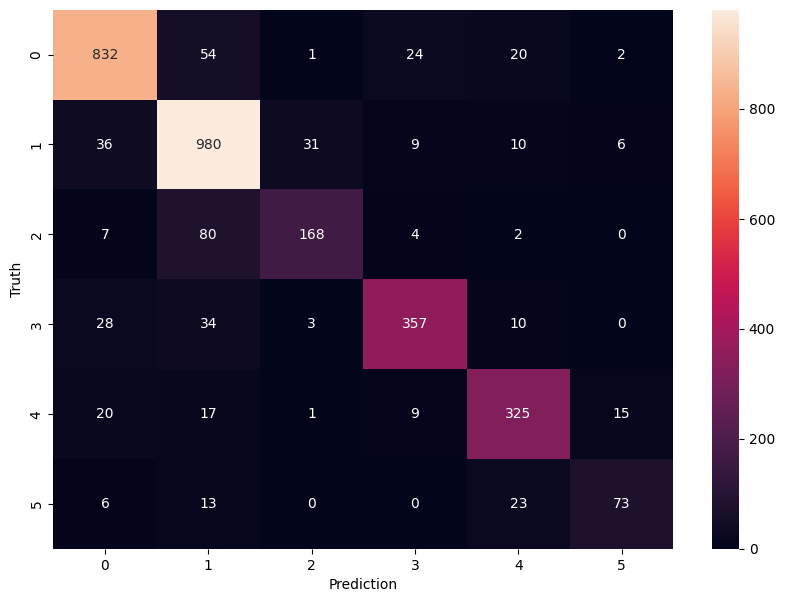

In [58]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')